In [1]:
# CNNで 「文字画像データセット（平仮名73文字版）」 を予測
# 前処理　特徴量を「charfeatures.npy」に出力
# ファイル名、ターゲットを「files_df.csv」に出力まで

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import keras as ks
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils

import os
import glob

import cv2


In [3]:
# 表示設定
pd.options.display.max_rows = 78
pd.options.display.max_columns = 78

In [4]:
# HiraganaKey.csv読み込み
labels = pd.read_csv('HiraganaKey.csv')

In [5]:
labels.head()

,文字,ディレクトリ,画像数
0,あ,U3042,"1,208"
1,い,U3044,"1,122"
2,う,U3046,"1,148"
3,え,U3048,"1,077"
4,お,U304A,"1,283"


In [6]:
path = "./dataset/hiragana73/"

In [7]:
dir_list = [dir for dir in os.listdir(path)]

In [8]:
dir_list[:5]

['charfeatures.npy', 'files_df.csv', 'U3042', 'U3044', 'U3046']

In [9]:
# 先頭リストの画像ファイル名を取得
first_images_path = path + dir_list[2]
first_images_name = sorted(glob.glob(first_images_path + '/' + '*.png'))

In [10]:
first_images_name[:5]

['./dataset/hiragana73/U3042\\1900_753325_0060.png',
 './dataset/hiragana73/U3042\\1900_754949_0023.png',
 './dataset/hiragana73/U3042\\1900_758495_0075.png',
 './dataset/hiragana73/U3042\\1900_761460_0029.png',
 './dataset/hiragana73/U3042\\1900_766994_0030.png']

In [11]:
len(first_images_name)

1208

In [12]:
files = []
moji = []

# 各画像ファイルのファイル名を取得
for dir_name in os.listdir(path):
    images_path = path + dir_name
    images = sorted(glob.glob(images_path + '/' + '*.png'))
        
    for name in images:
        files.append(str(name))
        moji.append(labels['文字'][labels['ディレクトリ'] == dir_name].values[0])
                              

In [13]:
files_pd = pd.DataFrame({'Image': files, 'Labels':moji}, index=None)

In [14]:
files_pd.shape

(80000, 2)

In [15]:
testchar = cv2.imread(files_pd['Image'][10], 0)

Label- あ
Image Shape- (48, 48)


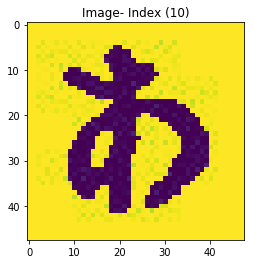

In [16]:
plt.imshow(testchar)
print("Label-", files_pd['Labels'][10])
print("Image Shape-", testchar.shape)
plt.title("Image- Index (10)")
plt.show()

In [17]:
# 各画像のパス名をシャッフル
files_pd = files_pd.sample(frac=1, random_state=42).reset_index(drop=True)

In [18]:
len(files_pd)

80000

In [19]:
files_pd['Image'].values[:5]

array(['./dataset/hiragana73/U306F\\1929_1452973_0089.png',
       './dataset/hiragana73/U306D\\1914_908938_0044.png',
       './dataset/hiragana73/U308F\\1926_938757_0025.png',
       './dataset/hiragana73/U308B\\1918_1210785_0064.png',
       './dataset/hiragana73/U306F\\1914_1239432_0055.png'], dtype=object)

In [20]:
# 画像データの読み込み
datalist = []

for image_file in files_pd['Image'].values:
    character = cv2.imread(image_file, 0)
    datalist.append(character.reshape(-1))


In [21]:
charfeatures = np.array(datalist)

In [22]:
charfeatures.shape

(80000, 2304)

In [23]:
# ファイルに出力
np.save(path + 'charfeatures.npy', charfeatures)

In [24]:
# files_df を CSV 出力
files_pd.to_csv(path + 'files_df.csv', index=False)

In [25]:
# charfeatures.npy
charfeatures_load = np.load(path + 'charfeatures.npy')

In [26]:
charfeatures_load.shape

(80000, 2304)

In [27]:
# files_df.csv読み込み
files_df_load = pd.read_csv(path + 'files_df.csv')

In [28]:
files_df_load.head()

,Image,Labels
0,./dataset/hiragana73/U306F\1929_1452973_0089.png,は
1,./dataset/hiragana73/U306D\1914_908938_0044.png,ね
2,./dataset/hiragana73/U308F\1926_938757_0025.png,わ
3,./dataset/hiragana73/U308B\1918_1210785_0064.png,る
4,./dataset/hiragana73/U306F\1914_1239432_0055.png,は
